<a href="https://colab.research.google.com/github/mir-sam-ali/CS5223-Deep-Learning-Project/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Project

## Data Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

mnist_dataset_train  = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
mnist_dataset_test = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



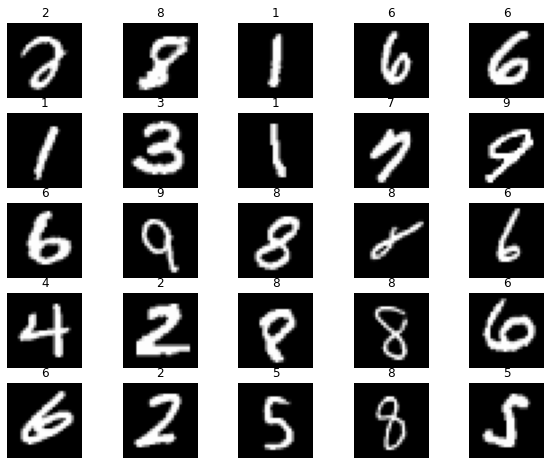

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_dataset_train), size=(1,)).item()
    img, label = mnist_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
mnist_dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

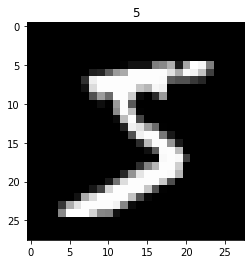

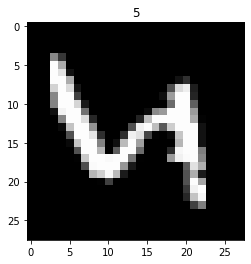

In [ ]:
inp = mnist_dataset_train.data[0]
plt.imshow(inp, cmap='gray')
plt.title('%i' % mnist_dataset_train.targets[0])
plt.show()
out = torch.rot90(input=inp, k=1, dims=[1,0])
plt.imshow(out, cmap='gray')
plt.title('%i' % mnist_dataset_train.targets[0])
plt.show()

In [ ]:
# custom tranformer for rotation

class Rotate(object):
    """Rotate the image counter clockwise by an angle counter clockwise.
    Args:
        angle (int): angle to rotate the image counter clockwise
    """

    def __init__(self, angle):
        self.angle = angle

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to be rotated.
        Returns:
            PIL Image: Rotated image.
        """
      
        return transforms.functional.rotate(img, self.angle)

    # def __repr__(self):
    #     format_string = self.__class__.__name__ + '(degrees={0}'.format(self.degrees)
    #     format_string += ', resample={0}'.format(self.resample)
    #     format_string += ', expand={0}'.format(self.expand)
    #     if self.center is not None:
    #         format_string += ', center={0}'.format(self.center)
    #     format_string += ')'
    #     return format_string

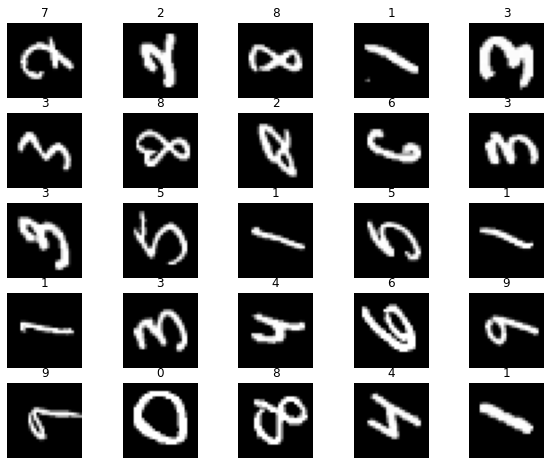

In [ ]:
mnist_90_dataset_train = None 
mnist_90_dataset_test = None

# Rotate the MNIST images by 90 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(90),
  ToTensor()
])
mnist_90_dataset_train  = datasets.MNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_90_dataset_test   = datasets.MNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_90_dataset_train), size=(1,)).item()
    img, label = mnist_90_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

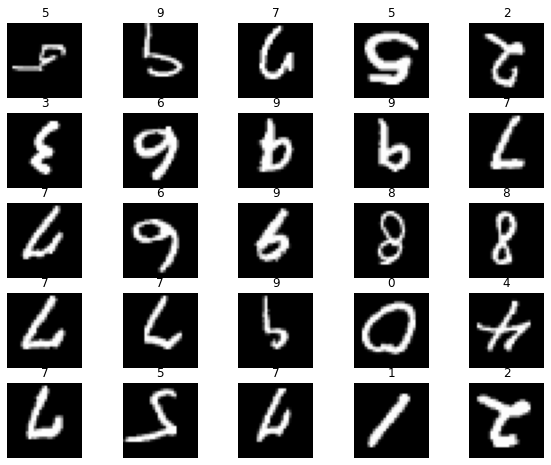

In [ ]:
mnist_180_dataset_train = None 
mnist_180_dataset_test = None 

# Rotate the MNIST images by 180 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(180),
  ToTensor()
])
mnist_180_dataset_train  = datasets.MNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_180_dataset_test   = datasets.MNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_180_dataset_train), size=(1,)).item()
    img, label = mnist_180_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

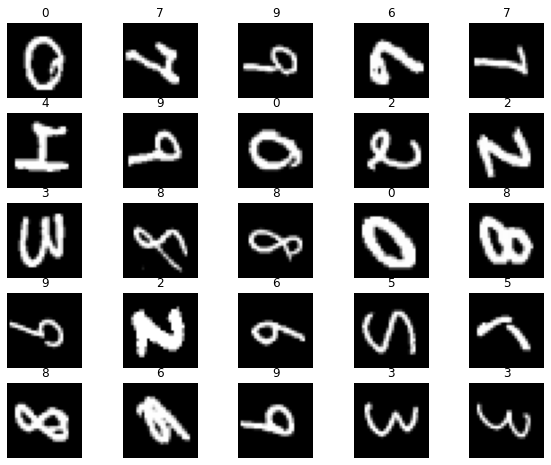

In [ ]:
mnist_270_dataset_train = None 
mnist_270_dataset_test = None

# Rotate the MNIST images by 270 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(270),
  ToTensor()
])
mnist_270_dataset_train  = datasets.MNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_270_dataset_test   = datasets.MNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_270_dataset_train), size=(1,)).item()
    img, label = mnist_270_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## MNIST Basic Classification (Model Building and Testing)

In [ ]:
from torch.utils.data import DataLoader
import torch.nn as nn 
from torch import optim


In [ ]:
loaders = {
    'train' : DataLoader(mnist_dataset_train, batch_size = 100, shuffle= True, num_workers=1),
    'test'  : DataLoader(mnist_dataset_test, batch_size = 100, shuffle= True, num_workers=1)
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f0bc3cb6990>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f0bc1e988d0>}

In [ ]:
# Creating the CNN class

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(1,16,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(16,32,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),
    )

    self.out = nn.Linear(32*7*7,10)

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)

    x = x.view(x.size(0), -1)
    output = self.out(x)

    return output, x



In [ ]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [ ]:
# Training

from torch.autograd import Variable

num_epochs = 10

def train(num_epochs,cnn,loaders):
  cnn.train()

  total_steps = len(loaders['train'])

  for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(loaders['train']):
      batch_x = Variable(images)
      batch_y = Variable(labels)

      output = cnn(batch_x)[0]
      loss = loss_func(output, batch_y)

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()
      if (i+1)%100 == 0:
        print('Epoch [{}/{}], Step[{},{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_steps, loss.item() ))

train(num_epochs, cnn, loaders)

In [ ]:
def test(test_data):
  
  cnn.eval()

  with torch.no_grad():
    correct = 0
    total = 0
    
    for images,labels in test_data:
      
      test_output, last_layer = cnn(images)
      pred_y = torch.max(test_output,1)[1].data.squeeze()
      accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)


test(loaders['test'])

Test Accuracy of the model on the 10000 test images: 1.00


## MNIST Classification on 90* Rotated Images (Testing)

In [ ]:
test(DataLoader(mnist_90_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.10


## MNIST Classification on 180* Rotated Images (Testing)

In [ ]:
test(DataLoader(mnist_180_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.46


## MNIST Classification on 270* Rotated Images (Testing)

In [ ]:
test(DataLoader(mnist_270_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.18


## Rotation Angle Classification Model

## Final Model